# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
from google.colab import drive
drive.mount("/content/drive")
data= image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    batch_size=32,
    image_size=(256, 256),
    label_mode='int'
)

Mounted at /content/drive
Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [3]:
data_iterator=data.as_numpy_iterator()

In [4]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

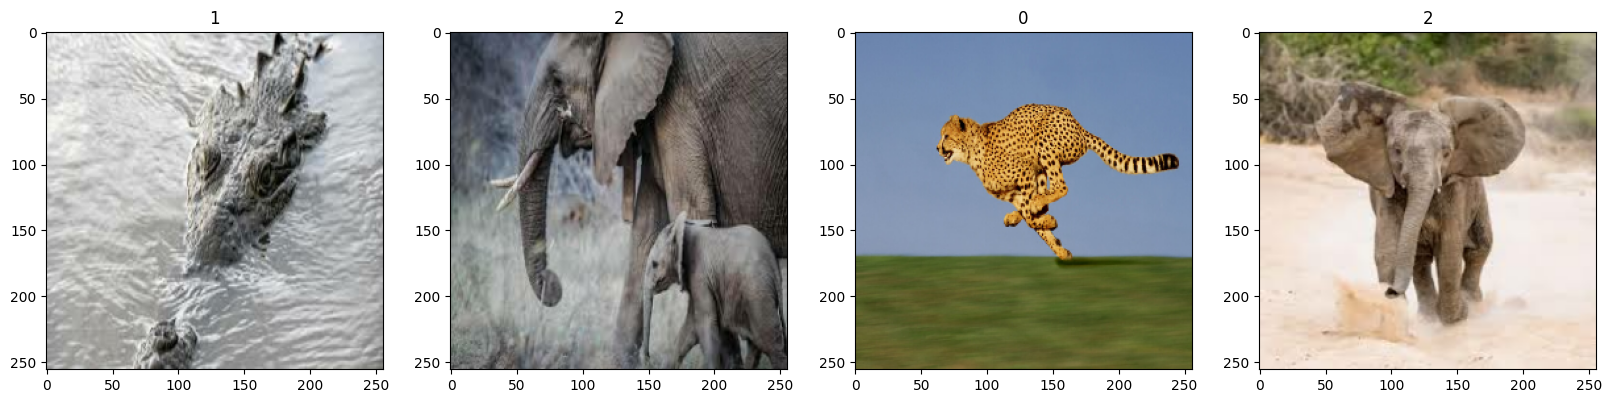

In [5]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [6]:
data = data.map(lambda x, y: (x / 255.0, y))


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [7]:
train_size = 0.9
train_data = data.take(int(len(data) * train_size))
test_data = data.skip(int(len(data) * train_size))

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [8]:
model= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

**Q.6** Compile your model

In [12]:
model.compile( optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
               )

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [13]:
model.fit(train_data, epochs=12)

Epoch 1/12
46/46 [==============================] - 15s 231ms/step - loss: 0.0395 - accuracy: 0.9871
Epoch 2/12
46/46 [==============================] - 15s 279ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 3/12
46/46 [==============================] - 13s 249ms/step - loss: 0.0333 - accuracy: 0.9878
Epoch 4/12
46/46 [==============================] - 14s 260ms/step - loss: 0.0160 - accuracy: 0.9932
Epoch 5/12
46/46 [==============================] - 14s 258ms/step - loss: 0.0096 - accuracy: 0.9959
Epoch 6/12
46/46 [==============================] - 13s 253ms/step - loss: 0.0119 - accuracy: 0.9939
Epoch 7/12
46/46 [==============================] - 13s 250ms/step - loss: 0.0946 - accuracy: 0.9728
Epoch 8/12
46/46 [==============================] - 14s 255ms/step - loss: 0.0928 - accuracy: 0.9694
Epoch 9/12
46/46 [==============================] - 13s 251ms/step - loss: 0.0797 - accuracy: 0.9803
Epoch 10/12
46/46 [==============================] - 14s 254ms/step - loss: 0.0266 - accura

**Q.8** Test your code with test set

In [14]:
loss,accuracy =model.evaluate(test_data)

6/6 [==============================] - 13s 147ms/step - loss: 0.0407 - accuracy: 0.9785


In [15]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9784946441650391


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**